In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## Data Collection

In [2]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-25,27.554169,28.322416,27.554169,28.259885,206620800
2015-03-26,27.746227,27.889157,27.379970,27.415703,190291600
2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800
2015-03-30,28.221918,28.228618,27.692631,27.703798,188398800
2015-03-31,27.788666,28.248720,27.773033,28.159389,168362400
...,...,...,...,...,...
2025-03-18,212.690002,215.149994,211.490005,214.160004,42432400
2025-03-19,215.240005,218.759995,213.750000,214.220001,54385400


## Data visualization & Exploration

In [3]:
df.shape

(2515, 5)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [6]:
df.describe() #statistical overview

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,98.702593,99.672092,97.626322,98.614625,1.129809e+08
std,67.916792,68.557763,67.183937,67.846605,6.552080e+07
min,20.674526,20.978909,20.475426,20.596726,2.323470e+07
25%,36.604809,36.963066,36.317977,36.684421,6.909200e+07
50%,73.403656,73.774425,72.021231,73.034274,9.697010e+07
75%,156.590790,158.605337,154.270380,156.768302,1.375348e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [7]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [8]:
df = df.reset_index()
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-03-25,27.554169,28.322416,27.554169,28.259885,206620800
1,2015-03-26,27.746227,27.889157,27.379970,27.415703,190291600
2,2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800
3,2015-03-30,28.221918,28.228618,27.692631,27.703798,188398800
4,2015-03-31,27.788666,28.248720,27.773033,28.159389,168362400
...,...,...,...,...,...,...
2510,2025-03-18,212.690002,215.149994,211.490005,214.160004,42432400
2511,2025-03-19,215.240005,218.759995,213.750000,214.220001,54385400
2512,2025-03-20,214.100006,217.490005,212.220001,213.990005,48862900


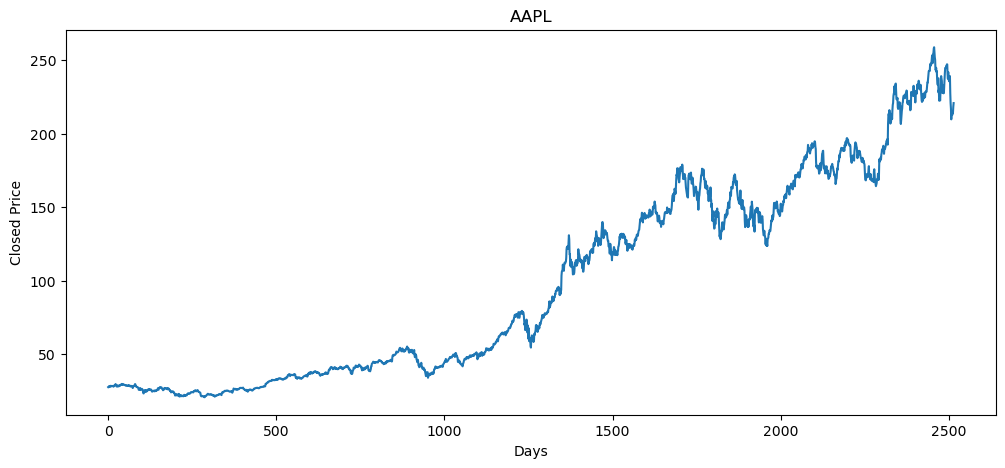

In [9]:
plt.figure(figsize=(12,5));
plt.plot(df.Close);
plt.title(ticker);
plt.xlabel('Days');
plt.ylabel('Closed Price');

## Feature Engineering

### 100 days moving average

In [10]:
df['MA_100'] = df.Close.rolling(100).mean()

In [11]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-03-25,27.554169,28.322416,27.554169,28.259885,206620800,NaN
1,2015-03-26,27.746227,27.889157,27.379970,27.415703,190291600,NaN
2,2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800,NaN
3,2015-03-30,28.221918,28.228618,27.692631,27.703798,188398800,NaN
4,2015-03-31,27.788666,28.248720,27.773033,28.159389,168362400,NaN
...,...,...,...,...,...,...,...
98,2015-08-13,25.940489,26.222083,25.803071,26.140984,194143200,NaN
99,2015-08-14,26.122961,26.201807,25.683674,25.753509,171718000,28.224728
100,2015-08-17,26.393295,26.503680,26.019337,26.140986,163538800,28.213120


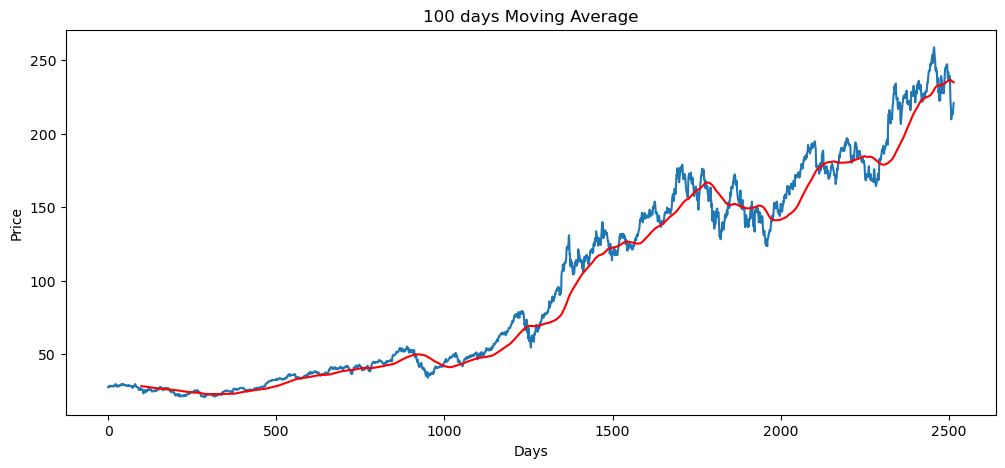

In [12]:
plt.figure(figsize=(12,5));
plt.plot(df.Close);
plt.plot(df['MA_100'], 'r');
plt.title('100 days Moving Average');
plt.xlabel('Days');
plt.ylabel('Price');

In [13]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-03-25,27.554169,28.322416,27.554169,28.259885,206620800,NaN,NaN
1,2015-03-26,27.746227,27.889157,27.379970,27.415703,190291600,NaN,NaN
2,2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800,NaN,NaN
3,2015-03-30,28.221918,28.228618,27.692631,27.703798,188398800,NaN,NaN
4,2015-03-31,27.788666,28.248720,27.773033,28.159389,168362400,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-01-06,22.782360,23.160182,22.594582,22.750687,273829600,25.572442,NaN
199,2016-01-07,21.820841,22.653404,21.816317,22.325357,324377600,25.529421,26.877075
200,2016-01-08,21.936226,22.422642,21.890979,22.295948,283192000,25.484850,26.848985


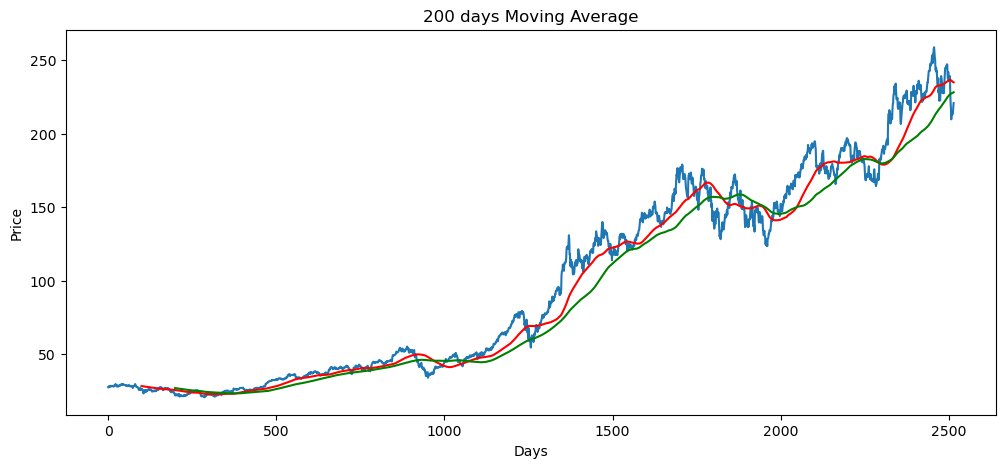

In [14]:
plt.figure(figsize=(12,5));
plt.plot(df.Close);
plt.plot(df['MA_100'], 'r');
plt.plot(df['MA_200'], 'g');
plt.title('200 days Moving Average');
plt.xlabel('Days');
plt.ylabel('Price');

### calculating % changed in each trading session

In [15]:
df['percentage changed'] = df.Close.pct_change()
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200,percentage changed
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,
0,2015-03-25,27.554169,28.322416,27.554169,28.259885,206620800,NaN,NaN,NaN
1,2015-03-26,27.746227,27.889157,27.379970,27.415703,190291600,NaN,NaN,0.006970
2,2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800,NaN,NaN,-0.007968
3,2015-03-30,28.221918,28.228618,27.692631,27.703798,188398800,NaN,NaN,0.025314
4,2015-03-31,27.788666,28.248720,27.773033,28.159389,168362400,NaN,NaN,-0.015352
...,...,...,...,...,...,...,...,...,...
2510,2025-03-18,212.690002,215.149994,211.490005,214.160004,42432400,235.439610,227.588524,-0.006121
2511,2025-03-19,215.240005,218.759995,213.750000,214.220001,54385400,235.238590,227.711478,0.011989
2512,2025-03-20,214.100006,217.490005,212.220001,213.990005,48862900,235.077057,227.823947,-0.005296


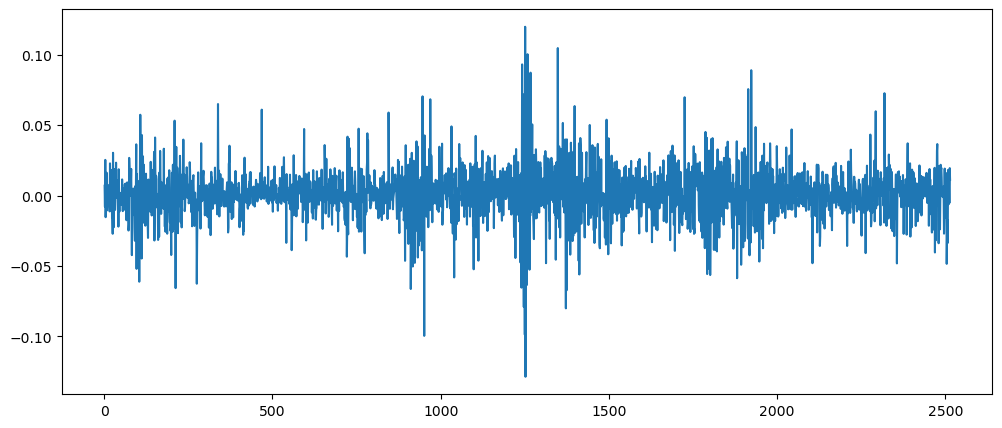

In [16]:
plt.figure(figsize=(12,5));
plt.plot(df['percentage changed']);

### Data Preprocessing

In [17]:
df.shape

(2515, 9)

In [18]:
#splitting data into training & testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])
print(data_training)
print(data_testing)

Ticker        AAPL
0        27.554169
1        27.746227
2        27.525137
3        28.221918
4        27.788666
...            ...
1755    148.218338
1756    152.617050
1757    157.045288
1758    158.058868
1759    161.365311

[1760 rows x 1 columns]
Ticker        AAPL
1760    162.743011
1761    166.128128
1762    167.495987
1763    171.294418
1764    171.934082
...            ...
2510    212.690002
2511    215.240005
2512    214.100006
2513    218.270004
2514    220.729996

[755 rows x 1 columns]


In [19]:
#scalling down the dat between zero and one

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04348551],
       [0.0446995 ],
       [0.04330201],
       ...,
       [0.86198558],
       [0.86839231],
       [0.889292  ]])

### Sequence Creation

In [22]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train

array([[[0.04348551],
        [0.0446995 ],
        [0.04330201],
        ...,
        [0.03341375],
        [0.03328561],
        [0.034439  ]],

       [[0.0446995 ],
        [0.04330201],
        [0.04770629],
        ...,
        [0.03328561],
        [0.034439  ],
        [0.03614775]],

       [[0.04330201],
        [0.04770629],
        [0.04496775],
        ...,
        [0.034439  ],
        [0.03614775],
        [0.03520796]],

       ...,

       [[0.79656406],
        [0.79166347],
        [0.79135339],
        ...,
        [0.83175607],
        [0.80619133],
        [0.83399514]],

       [[0.79166347],
        [0.79135339],
        [0.7955714 ],
        ...,
        [0.80619133],
        [0.83399514],
        [0.86198558]],

       [[0.79135339],
        [0.7955714 ],
        [0.79265594],
        ...,
        [0.83399514],
        [0.86198558],
        [0.86839231]]])

In [24]:
x_train.shape

(1660, 100, 1)

In [25]:
y_train

array([0.03614775, 0.03520796, 0.03308628, ..., 0.86198558, 0.86839231,
       0.889292  ])

In [26]:
y_train.shape

(1660,)

### Model Building

In [27]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [28]:
#ML model
from keras.models import Sequential
from keras.layers import Dense, Input, LSTM

In [29]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

### Model Training

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0197
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 3.4595e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 3.9549e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 3.2389e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 3.4730e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 3.3613e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 3.3080e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 3.9607e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 3.3959e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 3.2355e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 2.1300e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 3.6710e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 3.4636e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 2.7789e-04
Epoc

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [32]:
model.save('stock_prediction_model.keras')

### Preparing Test Data

In [33]:
data_testing

Ticker,AAPL
1760,162.743011
1761,166.128128
1762,167.495987
1763,171.294418
1764,171.934082
...,...
2510,212.690002
2511,215.240005
2512,214.100006
2513,218.270004


In [34]:
past_100_days = data_training.tail(100)

In [35]:
past_100_days

Ticker,AAPL
1660,146.538208
1661,146.076965
1662,149.727707
1663,147.009262
1664,146.184952
...,...
1755,148.218338
1756,152.617050
1757,157.045288
1758,158.058868


In [36]:
finaldf = pd.concat([past_100_days, data_testing], ignore_index=True)
finaldf

Ticker,AAPL
0,146.538208
1,146.076965
2,149.727707
3,147.009262
4,146.184952
...,...
850,212.690002
851,215.240005
852,214.100006
853,218.270004


In [53]:
input_data = scaler.fit_transform(finaldf)
input_data

array([[1.69846098e-01],
       [1.66433339e-01],
       [1.93445374e-01],
       [1.73331453e-01],
       [1.67232336e-01],
       [1.74928997e-01],
       [1.85603185e-01],
       [1.81754855e-01],
       [1.85681538e-01],
       [1.79573163e-01],
       [1.82263698e-01],
       [1.61248039e-01],
       [1.60884500e-01],
       [1.76300965e-01],
       [1.76373560e-01],
       [1.83645263e-01],
       [2.01752263e-01],
       [2.33602541e-01],
       [2.53091219e-01],
       [2.56509059e-01],
       [2.59344671e-01],
       [2.63199098e-01],
       [2.25894703e-01],
       [2.50836819e-01],
       [2.87632257e-01],
       [2.83778395e-01],
       [2.76433646e-01],
       [2.62471792e-01],
       [2.87777673e-01],
       [3.30390315e-01],
       [3.58750497e-01],
       [3.54969117e-01],
       [3.90528406e-01],
       [3.63549902e-01],
       [3.53296608e-01],
       [3.89437561e-01],
       [3.38243795e-01],
       [3.30099371e-01],
       [3.19991831e-01],
       [3.43552607e-01],


In [38]:
input_data.shape

(855, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [41]:
x_test

array([[[0.1698461 ],
        [0.16643334],
        [0.19344537],
        ...,
        [0.24758856],
        [0.25508809],
        [0.27955264]],

       [[0.16643334],
        [0.19344537],
        [0.17333145],
        ...,
        [0.25508809],
        [0.27955264],
        [0.28974632]],

       [[0.19344537],
        [0.17333145],
        [0.16723234],
        ...,
        [0.27955264],
        [0.28974632],
        [0.31479298]],

       ...,

       [[0.78925814],
        [0.78785546],
        [0.79405698],
        ...,
        [0.66899957],
        [0.65930683],
        [0.67817444]],

       [[0.78785546],
        [0.79405698],
        [0.80874874],
        ...,
        [0.65930683],
        [0.67817444],
        [0.66973952]],

       [[0.79405698],
        [0.80874874],
        [0.81074211],
        ...,
        [0.67817444],
        [0.66973952],
        [0.70059356]]])

In [54]:
y_test

array([162.74301147, 166.12812805, 167.49598694, 171.29441833,
       171.93408203, 172.80003357, 176.10644531, 174.93544006,
       171.82583618, 171.53059387, 175.59474182, 172.26864624,
       169.09011841, 169.39518738, 167.37789917, 163.10707092,
       164.9866333 , 167.68293762, 162.65440369, 162.4379425 ,
       164.73078918, 164.56349182, 163.76641846, 159.2102356 ,
       160.28286743, 154.29981995, 154.07347107, 161.03074646,
       155.13623047, 155.4413147 , 156.93707275, 163.37277222,
       154.27027893, 154.99954224, 149.85523987, 152.2696991 ,
       144.37586975, 140.49298096, 144.977005  , 143.42974854,
       147.07614136, 138.77822876, 135.35853577, 135.59503174,
       141.03500366, 138.32489014, 138.48257446, 141.69529724,
       147.4703064 , 146.68190002, 146.55378723, 149.01757812,
       143.27207947, 144.02105713, 146.55378723, 145.81468201,
       140.5717926 , 135.14169312, 129.96784973, 130.83506775,
       133.46632385, 128.17420959, 129.65246582, 133.89

### Making Prediction

In [43]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step 


In [55]:
y_predicted

array([159.0455  , 161.3049  , 164.03781 , 166.15381 , 169.04134 ,
       170.86049 , 172.01207 , 174.2094  , 174.70624 , 173.02246 ,
       171.8049  , 173.48578 , 172.86711 , 170.64929 , 169.57545 ,
       168.15233 , 165.26671 , 164.63852 , 165.99641 , 164.4318  ,
       163.17574 , 163.69083 , 164.11154 , 163.92485 , 161.48955 ,
       160.45537 , 157.25032 , 155.1973  , 157.50725 , 156.68828 ,
       155.97568 , 156.281   , 159.65549 , 157.59485 , 156.0578  ,
       152.91353 , 152.04922 , 148.47444 , 144.49277 , 143.94875 ,
       143.60574 , 144.98074 , 142.73044 , 139.44179 , 137.33679 ,
       138.31734 , 138.51448 , 138.56137 , 139.81358 , 143.15932 ,
       145.28885 , 146.25421 , 147.62337 , 146.01279 , 144.87103 ,
       145.31892 , 145.56273 , 143.51918 , 139.79053 , 135.34059 ,
       132.7872  , 132.47852 , 130.89365 , 130.13258 , 131.3159  ,
       132.35231 , 134.03877 , 136.52072 , 138.2527  , 137.54504 ,
       137.27618 , 136.23714 , 136.25911 , 137.48247 , 139.026

In [44]:
y_test

array([2.89746321e-01, 3.14792983e-01, 3.24913846e-01, 3.53018646e-01,
       3.57751553e-01, 3.64158775e-01, 3.88623096e-01, 3.79958764e-01,
       3.56950636e-01, 3.54766122e-01, 3.84836974e-01, 3.60227012e-01,
       3.36708911e-01, 3.38966133e-01, 3.24040108e-01, 2.92440017e-01,
       3.06347001e-01, 3.26297104e-01, 2.89090708e-01, 2.87489099e-01,
       3.04453997e-01, 3.03216155e-01, 2.97318565e-01, 2.63607120e-01,
       2.71543582e-01, 2.27274688e-01, 2.25599920e-01, 2.77077179e-01,
       2.33463335e-01, 2.35720669e-01, 2.46787865e-01, 2.94405955e-01,
       2.27056112e-01, 2.32451971e-01, 1.94388998e-01, 2.12253713e-01,
       1.53846840e-01, 1.25117134e-01, 1.58294672e-01, 1.46846438e-01,
       1.73826297e-01, 1.12429590e-01, 8.71270949e-02, 8.88769415e-02,
       1.29127590e-01, 1.09075312e-01, 1.10242027e-01, 1.34013138e-01,
       1.76742745e-01, 1.70909283e-01, 1.69961370e-01, 1.88191093e-01,
       1.45679836e-01, 1.51221562e-01, 1.69961370e-01, 1.64492690e-01,
      

In [45]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [46]:
y_predicted

array([159.0455  , 161.3049  , 164.03781 , 166.15381 , 169.04134 ,
       170.86049 , 172.01207 , 174.2094  , 174.70624 , 173.02246 ,
       171.8049  , 173.48578 , 172.86711 , 170.64929 , 169.57545 ,
       168.15233 , 165.26671 , 164.63852 , 165.99641 , 164.4318  ,
       163.17574 , 163.69083 , 164.11154 , 163.92485 , 161.48955 ,
       160.45537 , 157.25032 , 155.1973  , 157.50725 , 156.68828 ,
       155.97568 , 156.281   , 159.65549 , 157.59485 , 156.0578  ,
       152.91353 , 152.04922 , 148.47444 , 144.49277 , 143.94875 ,
       143.60574 , 144.98074 , 142.73044 , 139.44179 , 137.33679 ,
       138.31734 , 138.51448 , 138.56137 , 139.81358 , 143.15932 ,
       145.28885 , 146.25421 , 147.62337 , 146.01279 , 144.87103 ,
       145.31892 , 145.56273 , 143.51918 , 139.79053 , 135.34059 ,
       132.7872  , 132.47852 , 130.89365 , 130.13258 , 131.3159  ,
       132.35231 , 134.03877 , 136.52072 , 138.2527  , 137.54504 ,
       137.27618 , 136.23714 , 136.25911 , 137.48247 , 139.026

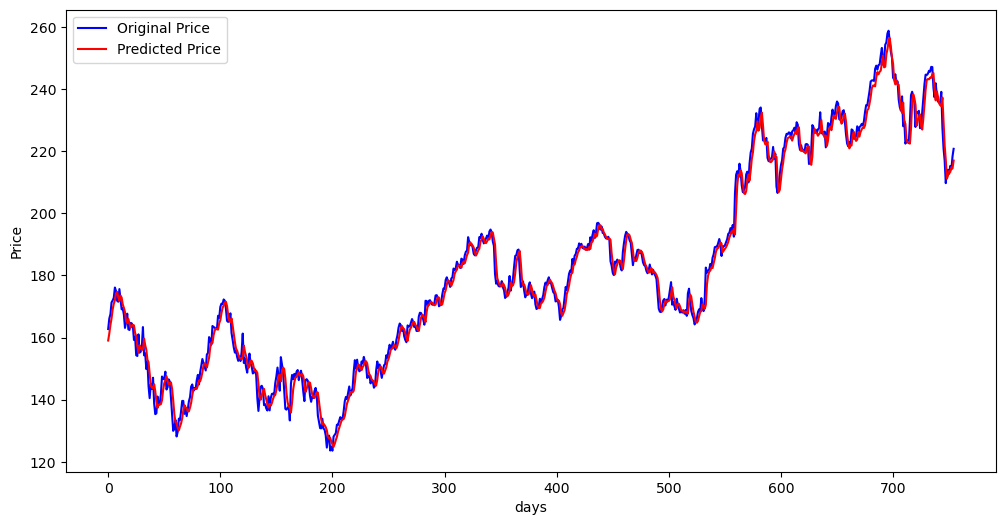

In [47]:
plt.figure(figsize=(12,6));
plt.plot(y_test, 'b', label='Original Price');
plt.plot(y_predicted, 'r', label='Predicted Price');
plt.xlabel('days');
plt.ylabel('Price');
plt.legend();

(160.0, 220.0)

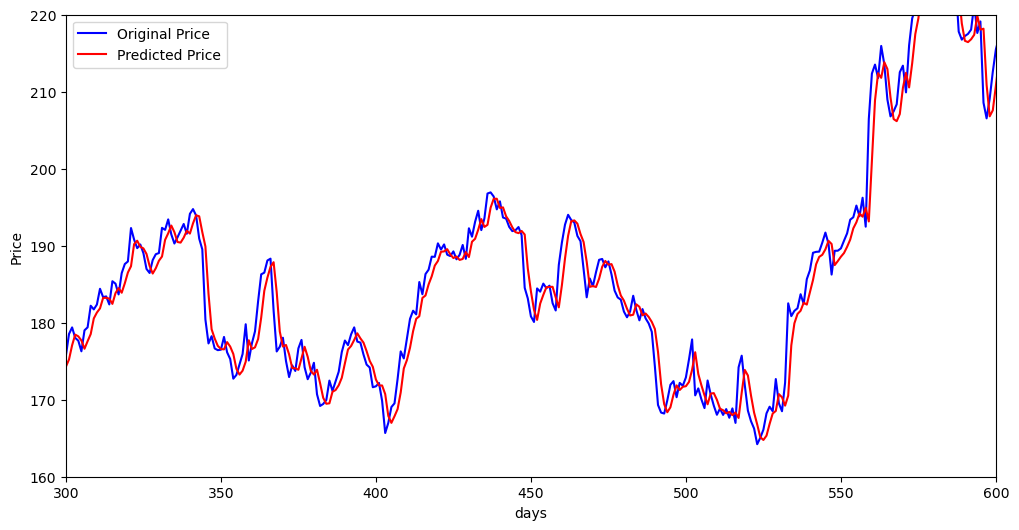

In [48]:
plt.figure(figsize=(12,6));
plt.plot(y_test, 'b', label='Original Price');
plt.plot(y_predicted, 'r', label='Predicted Price');
plt.xlabel('days');
plt.ylabel('Price');
plt.legend();
plt.xlim(300, 600)
plt.ylim(160, 220)

### Model Evaluation

In [49]:
#Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error:{mse}")

Mean Squared Error:10.872792280385339


In [51]:
#Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error:{rmse}")

Root Mean Squared Error:3.2973917389939187


In [52]:
#R-Squared
r2 = r2_score(y_test, y_predicted)
print(f'R-Squared: {r2}')

R-Squared: 0.9898252411147913
